# **Group Assignment** - Bike Sharing

- `instant`: record index
- `dteday` : date
- `season` : season (1:springer, 2:summer, 3:fall, 4:winter)
- `yr` : year (0: 2011, 1:2012)
- `mnth` : month ( 1 to 12)
- `hr` : hour (0 to 23)
- `holiday` : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- `weekday` : day of the week
- `workingday` : if day is neither weekend nor holiday is 1, otherwise is 0.
+ `weathersit` : 
	- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
	- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
	- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
	- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- `temp` : Normalized temperature in Celsius. The values are divided to 41 (max)
- `atemp`: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
- `hum`: Normalized humidity. The values are divided to 100 (max)
- `windspeed`: Normalized wind speed. The values are divided to 67 (max)
- `casual`: count of casual users
- `registered`: count of registered users
- `cnt`: count of total rental bikes including both casual and registered

## PART I: Exploratory Data Analysis

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
# from pycaret.datasets import get_data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
bike_df = get_data('bike-sharing_hourly', profile=False) #profile = True to get the insights

NameError: ignored

In [ ]:
bike_df = pd.read_csv("/content/drive/MyDrive/Group Assignment (2)/bike-sharing_hourly.csv")

In [ ]:
bike_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [ ]:
bike_df = bike_df.rename(columns={'yr': 'Year','hr':'Hour','mnth': 'Month','temp': 'Temperature', 'cnt': 'Count'})


season_map = {1: 'Fall', 2: 'Winter', 3: 'Spring', 4: 'Summer'}
bike_df['season'] = bike_df['season'].replace(season_map)
weekday_map = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
bike_df['weekday_let'] = bike_df['weekday']
bike_df['weekday_let'] = bike_df['weekday_let'].replace(weekday_map)

In [ ]:
bike_df

,instant,dteday,season,Year,Month,Hour,holiday,weekday,workingday,weathersit,Temperature,atemp,hum,windspeed,casual,registered,Count,weekday_let
0,1,2011-01-01,Fall,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16,Sunday
1,2,2011-01-01,Fall,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40,Sunday
2,3,2011-01-01,Fall,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32,Sunday
3,4,2011-01-01,Fall,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13,Sunday
4,5,2011-01-01,Fall,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,Fall,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119,Tuesday
17375,17376,2012-12-31,Fall,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89,Tuesday
17376,17377,2012-12-31,Fall,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90,Tuesday
17377,17378,2012-12-31,Fall,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61,Tuesday


In [ ]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [ ]:
bike_df['dteday'] = pd.to_datetime(bike_df['dteday'])
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [ ]:
bike_df["Working_Hours"] = np.where((bike_df["workingday"] == 1) & (bike_df["hr"] >= 8) & (bike_df["hr"] <= 17), 1 , 0)
bike_df['Working_Hours'].value_counts()

0    12406
1     4973
Name: Working_Hours, dtype: int64

In [ ]:
bike_df["Sleeping_Hours"] = np.where(((bike_df["hr"] <= 6) | (bike_df["hr"] >= 23)), 1 , 0)
bike_df['Sleeping_Hours'].value_counts()

0    11650
1     5729
Name: Sleeping_Hours, dtype: int64

In [ ]:
bike_df["hum_temp_ratio"] = bike_df["hum"] / bike_df["temp"]
bike_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,Working_Hours,Sleeping_Hours,hum_temp_ratio
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,0,1,3.375000
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,0,1,3.636364
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,0,1,3.636364
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,0,1,3.125000
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,0,1,3.125000


In [ ]:
bike_df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,Working_Hours,Sleeping_Hours,hum_temp_ratio
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16,0,1,3.375000
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40,0,1,3.636364
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32,0,1,3.636364
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13,0,1,3.125000
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1,0,1,3.125000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119,0,0,2.307692
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89,0,0,2.307692
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90,0,0,2.307692
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61,0,0,2.153846


In [ ]:
df_date = bike_df.groupby(['dteday']).mean()
df_date = df_date.reset_index()
df_date

,dteday,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,Working_Hours,Sleeping_Hours,hum_temp_ratio
0,2011-01-01,12.5,1.0,0.0,1.0,11.500000,0.0,6.0,0.0,1.583333,0.344167,0.363625,0.805833,0.160446,13.791667,27.250000,41.041667,0.000000,0.333333,2.543433
1,2011-01-02,36.0,1.0,0.0,1.0,11.782609,0.0,0.0,0.0,1.956522,0.363478,0.353739,0.696087,0.248539,5.695652,29.130435,34.826087,0.000000,0.304348,1.901087
2,2011-01-03,58.5,1.0,0.0,1.0,12.318182,0.0,1.0,1.0,1.000000,0.196364,0.189405,0.437273,0.248309,5.454545,55.863636,61.318182,0.454545,0.272727,2.418158
3,2011-01-04,81.0,1.0,0.0,1.0,11.869565,0.0,2.0,1.0,1.043478,0.200000,0.212122,0.590435,0.160296,4.695652,63.217391,67.913043,0.434783,0.304348,3.332820
4,2011-01-05,104.0,1.0,0.0,1.0,11.869565,0.0,3.0,1.0,1.000000,0.226957,0.229270,0.436957,0.186900,3.565217,66.000000,69.565217,0.434783,0.304348,2.084378
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,2012-12-27,17271.5,1.0,1.0,12.0,11.500000,0.0,4.0,1.0,1.666667,0.254167,0.226642,0.652917,0.350133,10.291667,77.791667,88.083333,0.416667,0.333333,2.601522
727,2012-12-28,17295.5,1.0,1.0,12.0,11.500000,0.0,5.0,1.0,1.708333,0.253333,0.255046,0.590000,0.155471,26.833333,102.125000,128.958333,0.416667,0.333333,2.373090
728,2012-12-29,17319.5,1.0,1.0,12.0,11.500000,0.0,6.0,0.0,2.041667,0.253333,0.242400,0.752917,0.124383,6.625000,49.250000,55.875000,0.000000,0.333333,3.056303
729,2012-12-30,17343.5,1.0,1.0,12.0,11.500000,0.0,0.0,0.0,1.333333,0.255833,0.231700,0.483333,0.350754,15.166667,59.666667,74.833333,0.000000,0.333333,1.931131


In [ ]:
df_season = bike_df.groupby(['yr','season']).mean()
df_season = df_season.reset_index()
df_season

,yr,season,instant,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,Working_Hours,Sleeping_Hours,hum_temp_ratio
0,0,1,1864.575919,3.156673,11.764507,0.034333,3.080271,0.657640,1.457930,0.275348,0.276990,0.574623,0.215586,10.360251,62.173598,72.533849,0.284333,0.312863,2.639041
1,0,2,2909.000000,4.655470,11.517022,0.021788,2.982297,0.695415,1.480254,0.534607,0.510330,0.658311,0.205680,35.208352,122.447571,157.655924,0.290513,0.331820,1.384687
2,0,3,5130.500000,7.687946,11.515179,0.021429,3.002232,0.705804,1.340179,0.701339,0.654150,0.644125,0.176337,42.611607,144.732143,187.343750,0.294643,0.330804,0.957352
3,0,4,7317.500000,10.696813,11.508435,0.033739,2.989691,0.673852,1.476101,0.426354,0.418061,0.694016,0.168109,24.748360,128.080600,152.828960,0.281162,0.332709,1.781255
4,1,1,10523.079577,3.084637,11.538178,0.042778,2.940662,0.659614,1.462282,0.321785,0.318213,0.587746,0.214652,18.029899,129.784269,147.814167,0.275989,0.330267,2.184422
5,1,2,11660.500000,4.652765,11.507253,0.021759,3.000907,0.695376,1.407072,0.554705,0.530750,0.595775,0.201144,57.097915,201.865367,258.963282,0.290118,0.332729,1.139610
6,1,3,13891.500000,7.691489,11.500000,0.021277,3.063830,0.691489,1.320479,0.711445,0.657844,0.622287,0.166882,57.908245,226.435284,284.343528,0.288121,0.333333,0.910094
7,1,4,16068.500000,10.708294,11.536702,0.034318,2.969971,0.679695,1.468065,0.419867,0.413375,0.639771,0.173575,36.686845,209.011916,245.698761,0.283603,0.331745,1.668192


In [ ]:
df_weekday = bike_df.groupby(['yr','weekday','hr']).mean()
df_weekday = df_weekday.reset_index()


In [ ]:
df_yr = bike_df.groupby(['yr']).sum()
df_yr = df_yr.reset_index()
df_yr

,yr,instant,season,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,Working_Hours,Sleeping_Hours,hum_temp_ratio
0,0,37372335,21730,56832,100054,239,26045,5911,12428,4228.00,4054.5089,5562.45,1652.6842,247252,995851,1243103,2488,2829,14453.668344
1,1,113651175,21746,56788,100617,261,26156,5954,12342,4409.14,4213.9866,5338.16,1651.0221,372765,1676811,2049576,2485,2900,12815.951956


## Plots: 2012

In [ ]:
fig = px.bar(df_season.loc[df_season.yr == 0], y='cnt', x='season', text_auto='.2s', title="Year 2011:  season vs cnt ")

fig.show()

In [ ]:
df_hr = bike_df.groupby(['yr','hr']).sum()
df_hr = df_hr.reset_index()
df_hr

,yr,hr,instant,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,Working_Hours,Sleeping_Hours,hum_temp_ratio
0,0,0,1553885,906,2370,10,1090,247,497,165.04,159.6531,256.01,58.3897,3423,12117,15540,0,361,692.618264
1,0,1,1548399,903,2361,10,1088,246,503,161.98,156.6069,258.57,56.9118,2071,7487,9558,0,360,720.093937
2,0,2,1533139,892,2335,10,1075,239,500,157.28,152.5007,258.15,53.4648,1570,5091,6661,0,352,731.588513
3,0,3,1522680,881,2313,9,1039,229,492,152.96,148.3343,255.40,51.7177,954,2487,3441,0,342,722.854237
4,0,4,1514601,879,2301,10,1017,225,474,150.18,145.7130,256.24,52.6441,431,1386,1817,0,337,725.803233
5,0,5,1547667,897,2355,10,1078,247,502,151.88,147.6223,267.19,53.3901,428,4729,5157,0,353,793.502321
6,0,6,1556524,906,2371,10,1092,248,524,154.40,150.4405,271.93,56.6743,1377,19424,20801,0,361,836.356995
7,0,7,1563170,910,2380,10,1092,248,543,158.22,153.7731,267.16,60.7175,3768,53162,56930,0,0,823.149452
8,0,8,1563533,910,2380,10,1092,248,548,164.36,159.1527,256.81,67.7176,6969,88498,95467,248,0,754.195354
9,0,9,1563896,910,2380,10,1092,248,546,172.56,165.5460,241.46,75.1211,8864,50622,59486,248,0,645.291368


In [ ]:
fig = px.bar(df_hr.loc[df_hr.yr == 0], y='cnt', x='hr', text_auto='.2s', title="Year 2011:  hr vs cnt ")

fig.show()

In [ ]:
fig = px.scatter(x=df_date.loc[df_date.yr == 0]['temp'], y=df_date.loc[df_date.yr == 0]['cnt'],title='correlation of temp and cnt over 2011 ')
fig.show()

## Plots: 2012

In [ ]:
fig = px.bar(df_season.loc[df_season.yr == 1], y='cnt', x='season', text_auto='.2s', title="Year 2012:  season vs cnt ")

fig.show()

In [ ]:
fig = px.bar(df_hr.loc[df_hr.yr == 1], y='cnt', x='hr', text_auto='.2s', title="Year 2012: cnt per hour ")

fig.show()

In [ ]:
# title="Year 2012: cnt per week day "
df_weekday = bike_df.groupby(['yr','weekday']).sum()
df_weekday = df_weekday.reset_index()

fig = px.bar(df_weekday.loc[df_weekday.yr == 1], y='cnt', x='weekday', text_auto='.2s')

fig.show()

In [ ]:
fig = px.scatter(x=df_date.loc[df_date.yr == 1]['temp'], y=df_date.loc[df_date.yr == 1]['cnt'],color =df_date.loc[df_date.yr == 1]['temp'],title='correlation of temp and cnt over 2012 ')
fig.show()

## Plots: 2011 & 2012

In [ ]:
# title='Bikes rented over 2011 and 2012'
fig = px.line(df_date, x='dteday', y='cnt')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()

In [ ]:
# cols = ['casual','registered']
# fig = px.line(df_date, x="dteday", y=cols,
#               hover_data={"dteday": "|%B %d, %Y"},
#               title='casual and registered in 2011 and 2012')
# fig.update_xaxes(
#     dtick="M1",
#     tickformat="%b\n%Y")
# fig.show()

In [ ]:
fig = go.Figure(data=[
    go.Bar(name='casual', x=df_date['season'], y=df_date['casual']),
    go.Bar(name='registered', x=df_date['season'], y=df_date['registered'])
    
])
fig.update_layout(title='Per Season: Casual vs Registered', barmode='group')

# Change the bar mode
fig.update_layout(barmode='group')
fig.show()

In [ ]:
fig = px.line(df_weekday.loc[df_weekday.yr == 0], x="hr", y="cnt", color='weekday', title='2011: Bike rented every day of the week per hour')
fig.show()

In [ ]:
input = '2011'

In [ ]:
input = '2011'
if input == '2011':
  fig = px.line(df_weekday.loc[df_weekday.yr == 0], x="hr", y="cnt", color='weekday')
  fig.show()
else:
  fig = px.line(df_weekday.loc[df_weekday.yr == 1], x="hr", y="cnt", color='weekday')
  fig.show()

In [ ]:
fig = px.line(df_weekday.loc[df_weekday.yr == 1], x="hr", y="cnt", color='weekday', title='2012: Bike rented every day of the week per hour')
fig.show()

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

values1 = [int(df_yr.loc[df_yr.yr == 0]['casual']), int(df_yr.loc[df_yr.yr == 0]['registered'])]

values2 = [int(df_yr.loc[df_yr.yr == 1]['casual']), int(df_yr.loc[df_yr.yr == 1]['registered'])]
labels =['casual','registered']
# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=labels, values=values1, name="2011"),
              1, 1)
fig.add_trace(go.Pie(labels=labels, values=values2, name="2012"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name")

fig.update_layout(
    title_text="Bikes Rented 2011-2012",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='2011', x=0.20, y=0.5, font_size=20, showarrow=False),
                 dict(text='2012', x=0.80, y=0.5, font_size=20, showarrow=False)])
fig.show()

In [ ]:
import plotly.graph_objects as go

labels =['casual','registered']
values = [int(df_yr.loc[df_yr.yr == 0]['casual']), int(df_yr.loc[df_yr.yr == 0]['registered'])]

# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.show()

In [ ]:
import plotly.graph_objects as go
import pandas as pd

# Define mapbox access token
mapbox_access_token = 'pk.eyJ1IjoibWFoYW1haGFtIiwiYSI6ImNsZmVmbzB5NzBsdzYzdGxycDVrbGhwczkifQ.3tBOuJe1-EeMkkCUJ2BizA'

# Define the center coordinates and zoom level of the map
center_lat = 38.9072
center_lon = -77.0369
zoom = 10

# Define the locations of interest
locations = {
    'Logan Circle': {'lat': 38.9097, 'lon': -77.031978},
    'Navy Yard': {'lat': 38.8765, 'lon': -77.0006},
    'Georgetown': {'lat': 38.909675, 'lon': -77.0654},
    'Capitol hill': {'lat': 38.8860, 'lon': -76.9995},
    'Downtown': {'lat': 38.9037, 'lon': -77.0363},
    'Brightwood': {'lat': 38.9649, 'lon': -77.0277},
    'Northwest Washington': {'lat': 38.9381, 'lon': -77.0449}
}

# Define the color for each neighborhood


# Define the data for the map
data = []
for neighborhood, location in locations.items():
    data.append(go.Scattermapbox(
        lat=[location['lat']],
        lon=[location['lon']],
        mode='markers',
        marker=go.scattermapbox.Marker(
            size=20,
            symbol='circle',
            color='rgb(194, 24, 7)',
            opacity=0.8
        ),
        name=neighborhood
    ))

# Define the layout for the map

layout = go.Layout(
    title='Neighborhoods of Interest in Washington DC',
    autosize=True,
    hovermode='x',
    mapbox=dict(
        accesstoken=mapbox_access_token,
        bearing=0,
        center=dict(
            lat=center_lat,
            lon=center_lon
        ),
        pitch=0,
        zoom=zoom,
        style='light'
    ),
)

# Create the figure and plot the map
fig = go.Figure(data=data, layout=layout)
fig.update_traces(showlegend=False)
fig.show()


## PCA

In [ ]:
bike_pca = bike_df.drop('dteday', axis = 1)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=16)
pca.fit(bike_pca)

PCA(n_components=16)

In [ ]:
exp_variance = pd.Series(pca.explained_variance_ratio_, name="Explained Var. Ratio")

fig = px.line(x=range(1,17), y=exp_variance, title="PCA Explained Variance Ratio", template="none")
fig.update_xaxes(title="Number of Components", tickmode = 'array', tickvals = list(range(1,17)))
fig.update_yaxes(title="Variance Ratio")

In [ ]:
pca = PCA(n_components=2)

X_pca = pca.fit_transform(bike_pca)
X_pca = pd.DataFrame(X_pca, columns=["Component 1","Component 2"])
X_pca.head()

,Component 1,Component 2
0,8691.233782,-110.371510
1,8689.822079,-79.379022
2,8688.950155,-89.050383
3,8688.289886,-114.557637
4,8687.492402,-129.807608


In [ ]:
#px.scatter(X_pca, x=X_pca["Component 1"], y=X_pca["Component 2"], color=X_pca["Component 2"].astype(str), title="PCA on Bike dataset", template="none", width=600, height=500)

## KDE

In [ ]:
cat_cols = [col for col in bike_df.columns if bike_df[col].dtype == 'object']
num_cols = [col for col in bike_df.columns if bike_df[col].dtype != 'object']
num_cols.remove("cnt")

<ipython-input-38-ad69ea2e3e62>:9: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-38-ad69ea2e3e62>:9: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-38-ad69ea2e3e62>:9: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-38-ad69ea2e3e62>:9: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




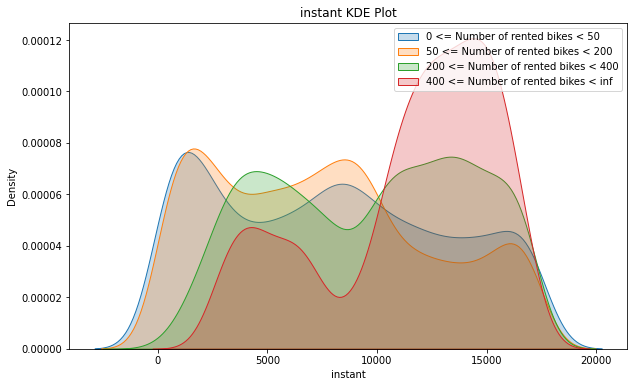

<ipython-input-38-ad69ea2e3e62>:9: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-38-ad69ea2e3e62>:9: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-38-ad69ea2e3e62>:9: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-38-ad69ea2e3e62>:9: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




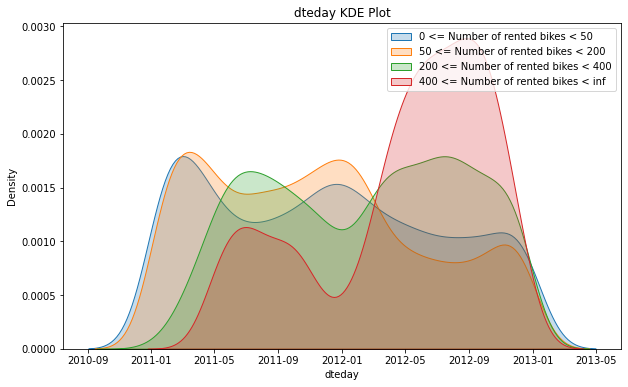

<ipython-input-38-ad69ea2e3e62>:9: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-38-ad69ea2e3e62>:9: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-38-ad69ea2e3e62>:9: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-38-ad69ea2e3e62>:9: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




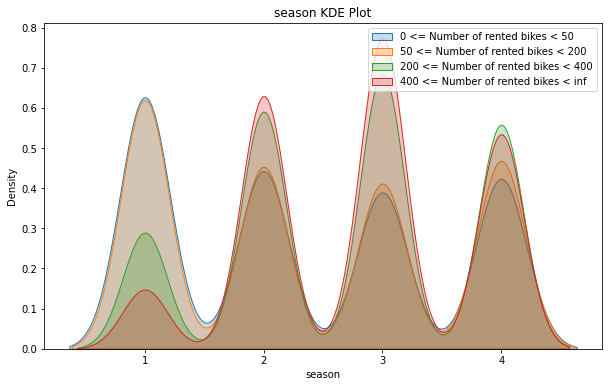

<ipython-input-38-ad69ea2e3e62>:9: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-38-ad69ea2e3e62>:9: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-38-ad69ea2e3e62>:9: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-38-ad69ea2e3e62>:9: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




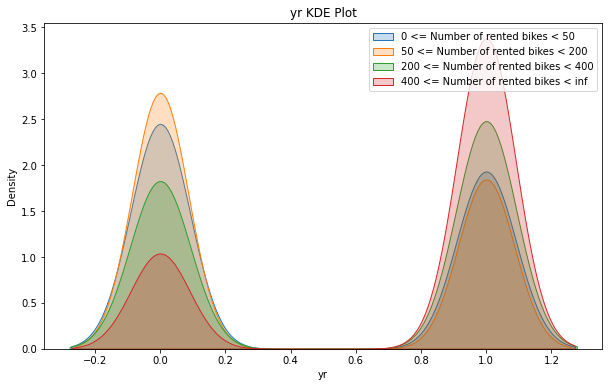

<ipython-input-38-ad69ea2e3e62>:9: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-38-ad69ea2e3e62>:9: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-38-ad69ea2e3e62>:9: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-38-ad69ea2e3e62>:9: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




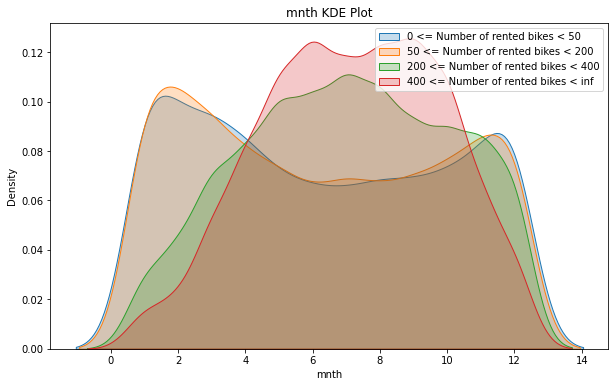

<ipython-input-38-ad69ea2e3e62>:9: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-38-ad69ea2e3e62>:9: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-38-ad69ea2e3e62>:9: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-38-ad69ea2e3e62>:9: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




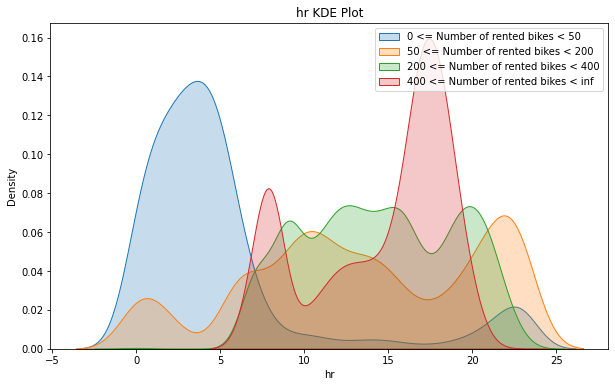

<ipython-input-38-ad69ea2e3e62>:9: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-38-ad69ea2e3e62>:9: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-38-ad69ea2e3e62>:9: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-38-ad69ea2e3e62>:9: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




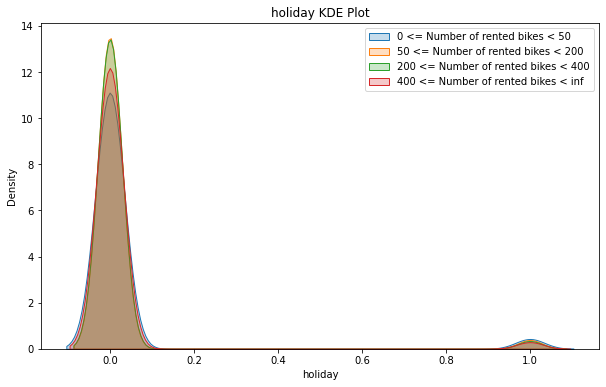

<ipython-input-38-ad69ea2e3e62>:9: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-38-ad69ea2e3e62>:9: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-38-ad69ea2e3e62>:9: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-38-ad69ea2e3e62>:9: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




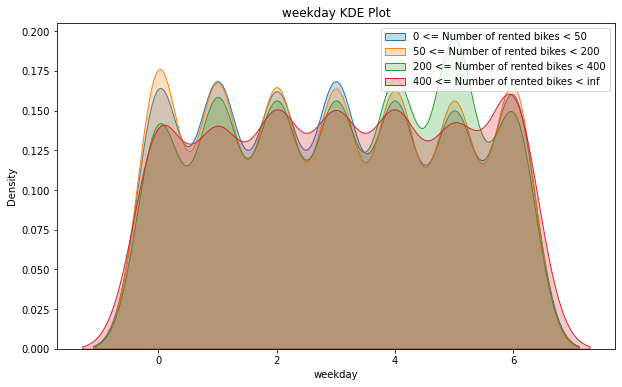

<ipython-input-38-ad69ea2e3e62>:9: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-38-ad69ea2e3e62>:9: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-38-ad69ea2e3e62>:9: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-38-ad69ea2e3e62>:9: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




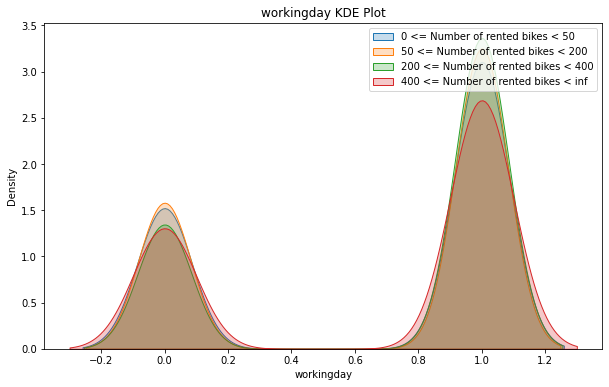

<ipython-input-38-ad69ea2e3e62>:9: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-38-ad69ea2e3e62>:9: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-38-ad69ea2e3e62>:9: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-38-ad69ea2e3e62>:9: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




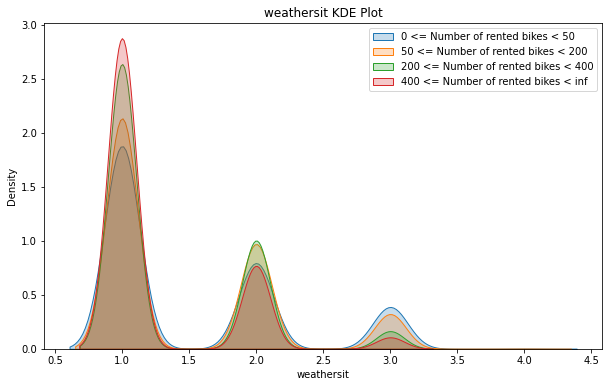

<ipython-input-38-ad69ea2e3e62>:9: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-38-ad69ea2e3e62>:9: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-38-ad69ea2e3e62>:9: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-38-ad69ea2e3e62>:9: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




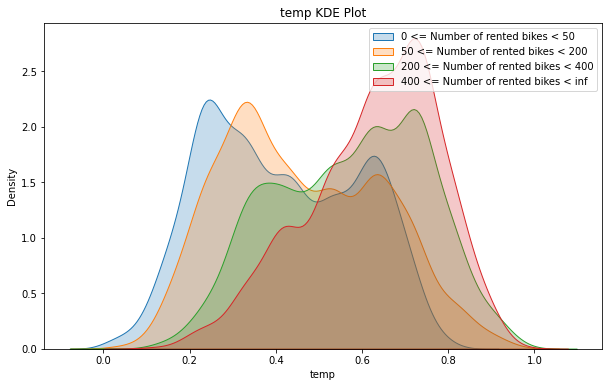

<ipython-input-38-ad69ea2e3e62>:9: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-38-ad69ea2e3e62>:9: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-38-ad69ea2e3e62>:9: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-38-ad69ea2e3e62>:9: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




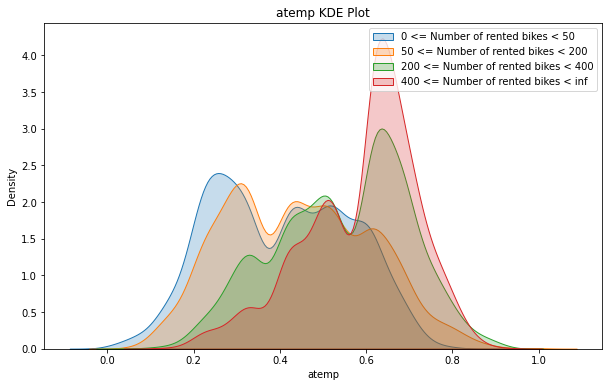

<ipython-input-38-ad69ea2e3e62>:9: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-38-ad69ea2e3e62>:9: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-38-ad69ea2e3e62>:9: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-38-ad69ea2e3e62>:9: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




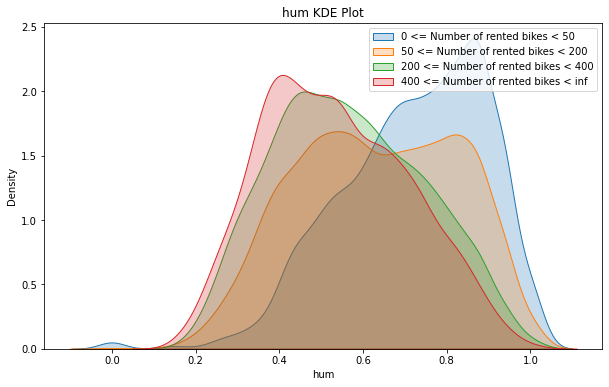

<ipython-input-38-ad69ea2e3e62>:9: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-38-ad69ea2e3e62>:9: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-38-ad69ea2e3e62>:9: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-38-ad69ea2e3e62>:9: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




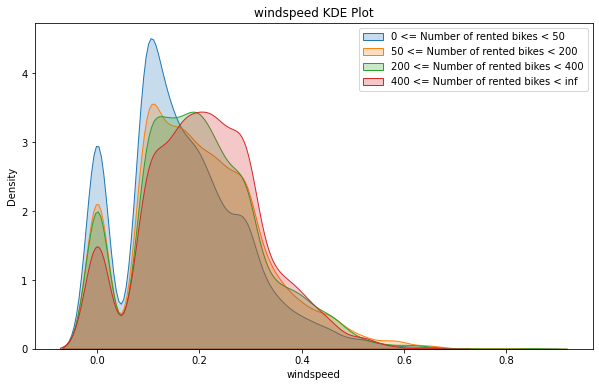

<ipython-input-38-ad69ea2e3e62>:9: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-38-ad69ea2e3e62>:9: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-38-ad69ea2e3e62>:9: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-38-ad69ea2e3e62>:9: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




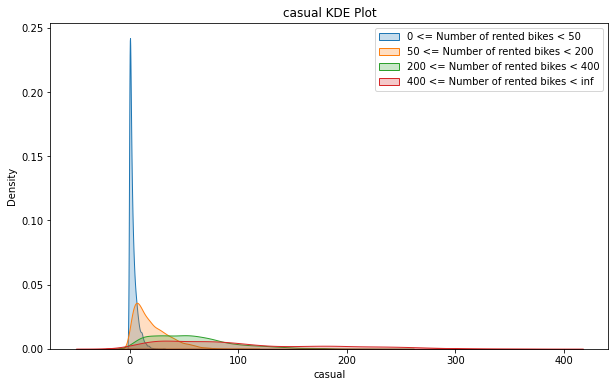

<ipython-input-38-ad69ea2e3e62>:9: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-38-ad69ea2e3e62>:9: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-38-ad69ea2e3e62>:9: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-38-ad69ea2e3e62>:9: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




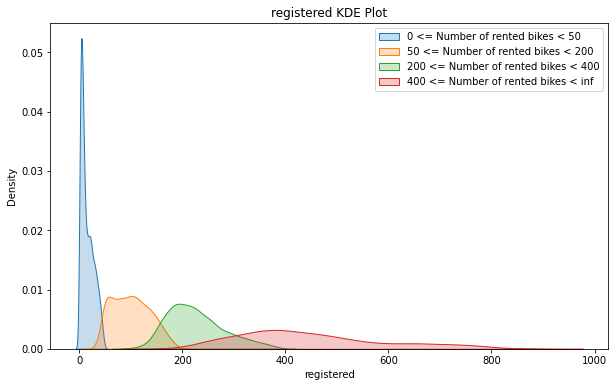

<ipython-input-38-ad69ea2e3e62>:9: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-38-ad69ea2e3e62>:9: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-38-ad69ea2e3e62>:9: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-38-ad69ea2e3e62>:9: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




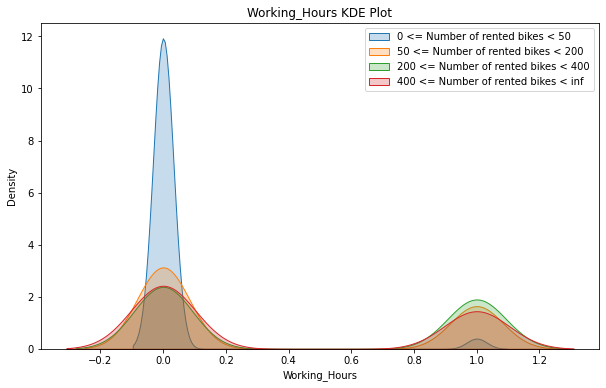

<ipython-input-38-ad69ea2e3e62>:9: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-38-ad69ea2e3e62>:9: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-38-ad69ea2e3e62>:9: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-38-ad69ea2e3e62>:9: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-38-ad69ea2e3e62>:9: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.



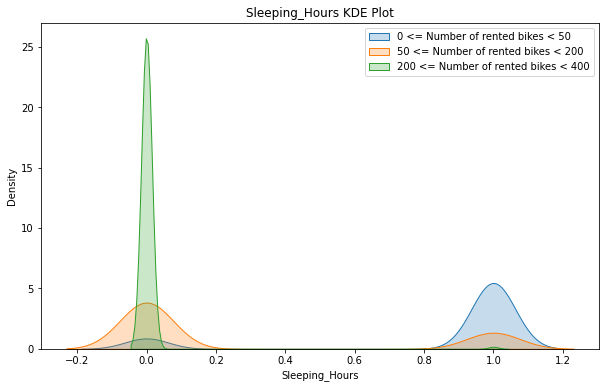

<ipython-input-38-ad69ea2e3e62>:9: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-38-ad69ea2e3e62>:9: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-38-ad69ea2e3e62>:9: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-38-ad69ea2e3e62>:9: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




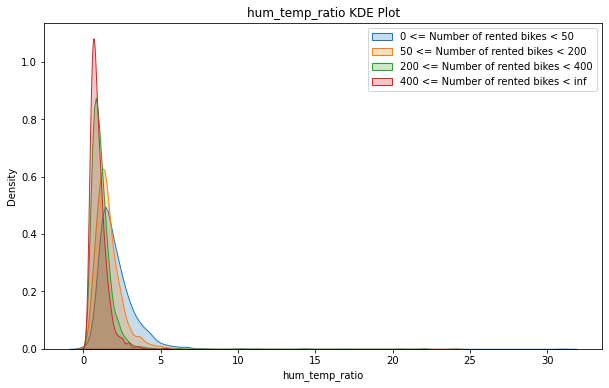

In [ ]:
# Define the ranges of 'cnt' values to plot
cnt_ranges = [(0, 50), (50, 200), (200, 400), (400, np.inf)]

for col in num_cols:
    plt.figure(figsize=(10, 6))
    for i, (cnt_min, cnt_max) in enumerate(cnt_ranges):
        subset = bike_df[(bike_df['cnt'] >= cnt_min) & (bike_df['cnt'] < cnt_max)]
        label = f'{cnt_min} <= Number of rented bikes < {cnt_max}'
        sns.kdeplot(subset[col], shade=True, label=label)
    plt.title(f"{col} KDE Plot")
    plt.legend()
    plt.show()


## PART II: Prediction Model

Let's start with using pycaret to identify the best models to use.

In [ ]:
from sklearn.model_selection import  train_test_split
from sklearn.model_selection import  GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from xgboost import XGBClassifier
from pycaret.regression import *
from sklearn.metrics import classification_report, f1_score, precision_score, roc_auc_score, recall_score, confusion_matrix, accuracy_score

## 1. Setup

In [ ]:
exp = setup(data = bike_df, target = 'cnt', train_size = 0.7, numeric_features = ['temp', 'atemp', 'hum', 'windspeed'], categorical_features = ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit'], fold = 5)

,Description,Value
0,session_id,369
1,Target,cnt
2,Original Data,"(17379, 20)"
3,Missing Values,False
4,Numeric Features,8
5,Categorical Features,10
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(12165, 65)"


## 2. Compare

In [ ]:
best_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,0.0001,0.0000,0.0001,1.0000,0.0000,0.0000,1.1900
lasso,Lasso Regression,0.0139,0.0004,0.0210,1.0000,0.0009,0.0005,0.0440
par,Passive Aggressive Regressor,0.0319,0.0014,0.0373,1.0000,0.0033,0.0016,0.0580
br,Bayesian Ridge,0.0014,0.0000,0.0037,1.0000,0.0002,0.0001,0.1880
huber,Huber Regressor,0.0003,0.0000,0.0004,1.0000,0.0000,0.0000,0.4200
lar,Least Angle Regression,0.0000,0.0000,0.0001,1.0000,0.0000,0.0000,0.0220
en,Elastic Net,0.0131,0.0004,0.0197,1.0000,0.0009,0.0005,0.0380
ridge,Ridge Regression,0.0001,0.0000,0.0002,1.0000,0.0000,0.0000,0.0380
omp,Orthogonal Matching Pursuit,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0540
knn,K Neighbors Regressor,1.1240,6.0879,2.4450,0.9998,0.0420,0.0213,0.1400


The scores are weird, might indicate a lot of overfitting for the low MAE, MSE. We tune it and evaluate it to verify this. We also tune and evaluate two other models, RF and catboost to have more insights.

### Linear Regression

In [ ]:
# create a Linear Regression model
lr_model = create_model('lr', fold=5)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0001,0.0000,0.0001,1.0000,0.0000,0.0000
1,0.0001,0.0000,0.0001,1.0000,0.0000,0.0000
2,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000
3,0.0001,0.0000,0.0001,1.0000,0.0000,0.0000
4,0.0001,0.0000,0.0001,1.0000,0.0000,0.0000
Mean,0.0001,0.0000,0.0001,1.0000,0.0000,0.0000
Std,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


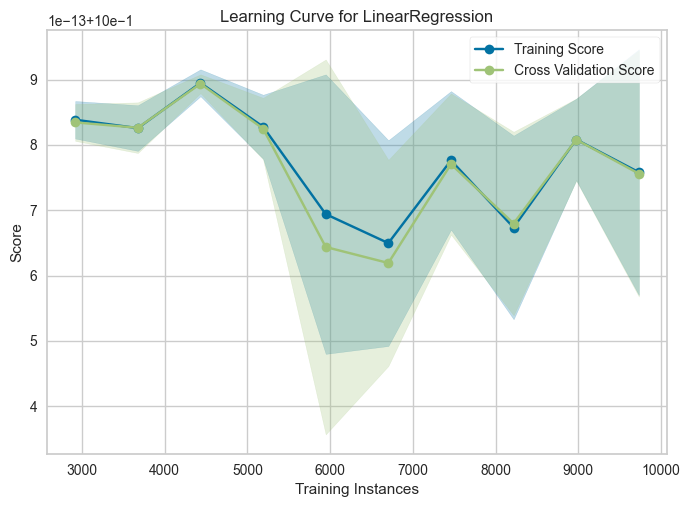

In [ ]:
# plot the Linear Regression model to check for overfitting
plot_model(lr_model, plot='learning')

Validation curve > training curve --> overfitting

### RF

In [ ]:
# create a Random Forest model
rf_model = create_model('rf', fold=5)

# tune the Random Forest model
tuned_rf_model = tune_model(rf_model, fold=5)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.1687,8.0982,2.8457,0.9998,0.0104,0.0058
1,1.2100,10.6136,3.2578,0.9997,0.0168,0.0064
2,1.1351,7.3236,2.7062,0.9998,0.0125,0.0058
3,1.2851,15.9125,3.9891,0.9995,0.0139,0.0063
4,1.1785,7.6367,2.7635,0.9998,0.0109,0.0058
Mean,1.1955,9.9169,3.1125,0.9997,0.0129,0.0060
Std,0.0508,3.2145,0.4791,0.0001,0.0023,0.0003


IntProgress(value=0, description='Processing: ', max=7)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,15:14:58
Status,. . . . . . . . . . . . . . . . . .,Searching Hyperparameters
Estimator,. . . . . . . . . . . . . . . . . .,Random Forest Regressor


,Fold,MAE,MSE,RMSE,R2,RMSLE,MAPE


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


In [ ]:
# evaluate RF
evaluate_model(tuned_rf_model)

### Catboost

In [ ]:
# create a CatBoost model
catboost_model = create_model('catboost', fold=5)

# tune the CatBoost model
tuned_catboost_model = tune_model(catboost_model, fold=5)

In [ ]:
# Evaluate CatBoost
evaluate_model(tuned_catboost_model)#

## Analyze the models

In [ ]:
# Distribution Plot
plot_model(tuned_rf_model, plot='distribution')

# Residual Plot
plot_model(tuned_rf_model, plot='residuals')

# Feature Importance Plot
plot_model(tuned_rf_model, plot='feature')

# Prediction Error Plot
plot_model(tuned_rf_model, plot='error')

# Learning Curve
plot_model(tuned_rf_model, plot='learning')

# Validation Curve
plot_model(tuned_rf_model, plot='vc')

## PART III: Streamlit dashboard

In [ ]:
### This part goes in a separate script ###